In [5]:
import matplotlib.pyplot as plt
import numpy as np
from extract_center import CenterExtracter
from skimage.measure import EllipseModel
plt.rcdefaults()

In [2]:
image = "../../codes/34.jpg"
ref_image = "../../codes/ref_image.jpg"

## Raw Image

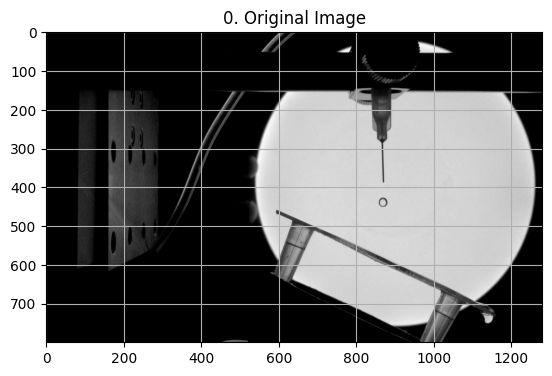

In [8]:
image_array = plt.imread(image)
ref_image_array = plt.imread(ref_image)
plt.imshow(image_array, cmap='gray')
plt.grid(True)
plt.title("0. Original Image")
plt.savefig("0.png")

## Cropped Image

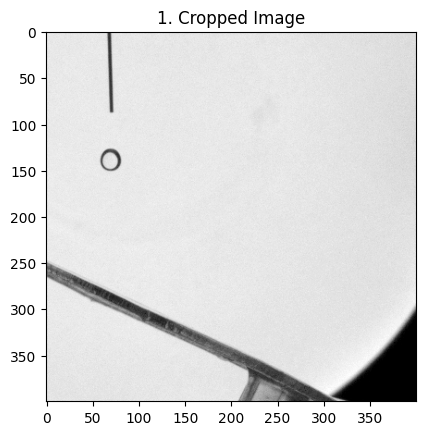

In [9]:
plt.imshow(image_array[300:700, 800:1200], cmap='gray')
plt.title("1. Cropped Image")
plt.savefig("1.png")

## Subtracted Image

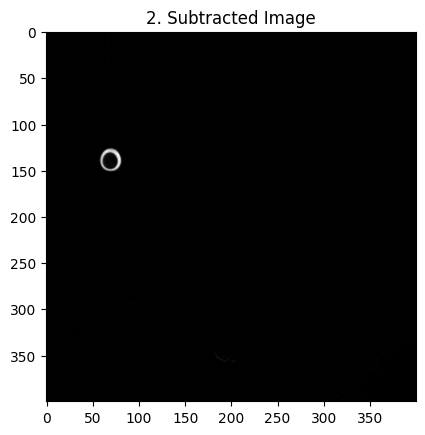

In [10]:
sub_image = np.maximum((ref_image_array / 255.0 - image_array / 255.0) * 255, 0)
plt.imshow(sub_image[300:700, 800:1200], cmap='gray')
plt.title('2. Subtracted Image')
plt.savefig("2.png")

## Thresholded Image

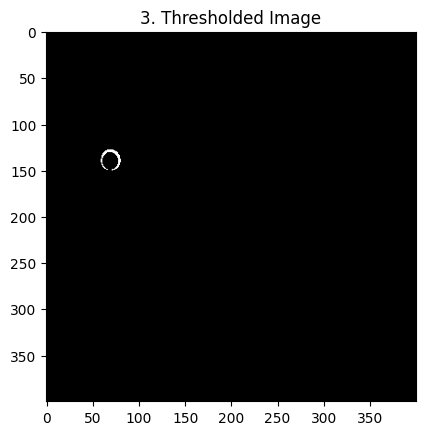

In [11]:
threholded_image = (sub_image > 110).astype(np.uint8)
plt.imshow(threholded_image[300:700, 800:1200], cmap='gray')
plt.title('3. Thresholded Image')
plt.savefig("3.png")

## Points

In [12]:
ce = CenterExtracter((800, 300, 1200, 700))

In [13]:
X, Y = ce._all_points_grayscale(sub_image[300:700, 800:1200])

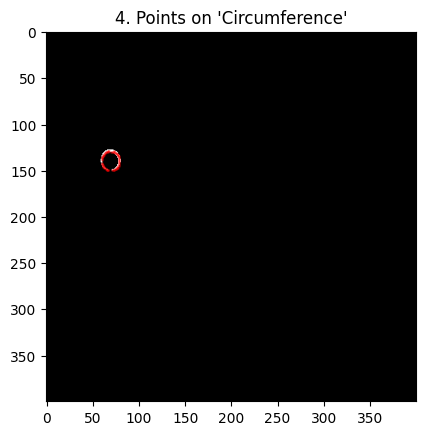

In [14]:
plt.imshow(threholded_image[300:700, 800:1200], cmap='gray')
plt.scatter(X, Y, s=1, c="red", alpha=0.3)
plt.title("4. Points on 'Circumference'")
plt.savefig("4.png")

## Ellipse

In [16]:
points = np.array([X, Y]).T
ell = EllipseModel()
ell.estimate(points)
xc, yc, a, b, theta = ell.params

In [17]:
xc

69.19891314576914

In [18]:
xc -  a * np.cos(t)

array([58.69607962, 58.71722522, 58.78057688, 58.88587951, 59.03270907,
       59.22047436, 59.4484193 , 59.71562603, 60.02101861, 60.36336734,
       60.74129369, 61.15327589, 61.59765503, 62.07264175, 62.57632345,
       63.10667199, 63.66155183, 64.23872867, 64.83587842, 65.45059657,
       66.08040787, 66.72277629, 67.37511524, 68.03479798, 68.69916821,
       69.36555072, 70.03126225, 70.6936222 , 71.34996349, 71.99764325,
       72.63405352, 73.25663168, 73.86287085, 74.45032991, 75.01664336,
       75.55953087, 76.07680642, 76.56638711, 77.02630159, 77.45469794,
       77.84985116, 78.2101701 , 78.53420389, 78.82064776, 79.06834831,
       79.27630812, 79.44368981, 79.56981941, 79.65418903, 79.69645894,
       79.69645894, 79.65418903, 79.56981941, 79.44368981, 79.27630812,
       79.06834831, 78.82064776, 78.53420389, 78.2101701 , 77.84985116,
       77.45469794, 77.02630159, 76.56638711, 76.07680642, 75.55953087,
       75.01664336, 74.45032991, 73.86287085, 73.25663168, 72.63

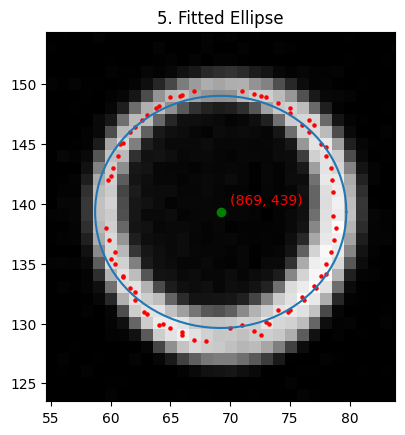

In [19]:
t = np.linspace(0, 2 * np.pi, 100)
plt.imshow(sub_image[300:700, 800:1200], cmap="gray")
plt.plot(xc + a * np.cos(t), yc + b * np.sin(t))
plt.scatter(xc,  yc, color="g")
plt.scatter(X, Y, s=5, c="r")
plt.xlim([np.min(X) - 5, np.max(X) + 5])
plt.ylim([np.min(Y) - 5, np.max(Y) + 5])
plt.annotate(
    f"{(int(xc)+ce.X, int(yc)+ce.Y)}",
    xy=( xc, yc),
    xytext=(int(xc)+1, int(yc)+1),
    color="r",
)
plt.title("5. Fitted Ellipse")
plt.savefig("5.png")

## Everything

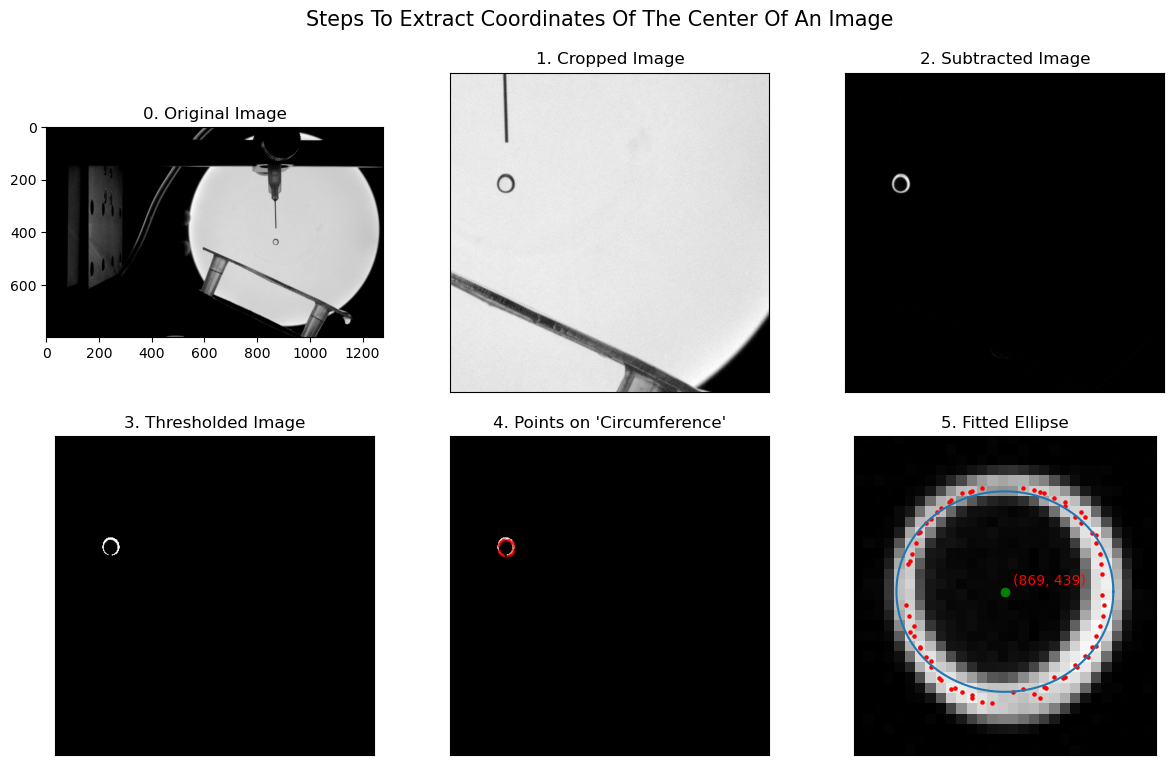

In [60]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 8)
fig.suptitle("Steps to extract coordinates of the center of an image\n".title(), fontsize=15)
fig.tight_layout()
for i in range(2):
    for j in range(3):
        if i==j==0:
            continue
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
ax = axes[0][0]
ax.imshow(image_array, cmap='gray')
ax.set_title('0. Original Image')
ax = axes[0][1]
ax.imshow(image_array[300:700, 800:1200], cmap='gray')
ax.set_title('1. Cropped Image')
ax = axes[0][2]
ax.imshow(sub_image[300:700, 800:1200], cmap='gray')
ax.set_title('2. Subtracted Image')
ax = axes[1][0]
ax.imshow(threholded_image[300:700, 800:1200], cmap='gray')
ax.set_title('3. Thresholded Image')
ax = axes[1][1]
ax.imshow(threholded_image[300:700, 800:1200], cmap='gray')
ax.scatter(X, Y, s=1, c="red", alpha=0.3)
ax.set_title("4. Points on 'Circumference'")
ax = axes[1][2]
t = np.linspace(0, 2 * np.pi, 100)
ax.imshow(sub_image[300:700, 800:1200], cmap="gray")
ax.plot(xc + a * np.cos(t), yc + b * np.sin(t))
ax.scatter(xc,  yc, color="g")
ax.scatter(X, Y, s=5, c="r")
ax.set_xlim([np.min(X) - 5, np.max(X) + 5])
ax.set_ylim([np.min(Y) - 5, np.max(Y) + 5])
ax.annotate(
    f"{(int(xc)+ce.X, int(yc)+ce.Y)}",
    xy=( xc, yc),
    xytext=(int(xc)+1, int(yc)+1),
    color="r",
)
ax.set_title('5. Fitted Ellipse')
fig.savefig("paper/final.png", dpi=300)